In [1]:
!git clone https://github.com/yu-gi-oh-leilei/ML-GCN_cvpr2019.git

Cloning into 'ML-GCN_cvpr2019'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 51 (delta 12), reused 49 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 1.70 MiB | 19.51 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
!git clone https://github.com/megvii-research/ML-GCN.git

Cloning into 'ML-GCN'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 57 (delta 10), reused 9 (delta 9), pack-reused 39 (from 1)
Receiving objects: 100% (57/57), 133.20 KiB | 4.76 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
%cd ./ML-GCN_cvpr2019/models

/content/ML-GCN_cvpr2019/models


https://github.com/yu-gi-oh-leilei/ML-GCN_cvpr2019/blob/bf185ae95bb91242eae71ad9a637c795f12bbfa5/images/framework.png

<img src="https://raw.githubusercontent.com/yu-gi-oh-leilei/ML-GCN_cvpr2019/bf185ae95bb91242eae71ad9a637c795f12bbfa5/images/framework.png" width="800">

In [37]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Load PASCAL VOC dataset
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor()])
voc_dataset = torchvision.datasets.VOCDetection(root="data", year="2007", image_set="train", download=True, transform=transform)

# Create DataLoader
voc_loader = DataLoader(voc_dataset, batch_size=1, shuffle=True)

# Check one sample
image, target = next(iter(voc_loader))
print("Image shape:", image.shape)
print("Labels:", target)


Using downloaded and verified file: data/VOCtrainval_06-Nov-2007.tar
Extracting data/VOCtrainval_06-Nov-2007.tar to data
Image shape: torch.Size([1, 3, 448, 448])
Labels: {'annotation': {'folder': ['VOC2007'], 'filename': ['008235.jpg'], 'source': {'database': ['The VOC2007 Database'], 'annotation': ['PASCAL VOC2007'], 'image': ['flickr'], 'flickrid': ['334575853']}, 'owner': {'flickrid': ['Train Chaser'], 'name': ['?']}, 'size': {'width': ['500'], 'height': ['333'], 'depth': ['3']}, 'segmented': ['0'], 'object': [{'name': ['train'], 'pose': ['Unspecified'], 'truncated': ['0'], 'difficult': ['0'], 'bndbox': {'xmin': ['48'], 'ymin': ['127'], 'xmax': ['337'], 'ymax': ['284']}}]}}


In [38]:
!gdown --id 1lhbmW5g-Mo9KgI07nmc1kwSbEnb6t-YA -O /content/ML-GCN_cvpr2019/checkpoint/voc_checkpoint.pth


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1lhbmW5g-Mo9KgI07nmc1kwSbEnb6t-YA
From (redirected): https://drive.google.com/uc?id=1lhbmW5g-Mo9KgI07nmc1kwSbEnb6t-YA&confirm=t&uuid=2c04c3bd-8392-41b9-b40c-d835e9076a9d
To: /content/ML-GCN_cvpr2019/checkpoint/voc_checkpoint.pth
100% 180M/180M [00:00<00:00, 226MB/s]


In [39]:
import torch
from torchvision import models
from mlgcn import MLGCN  # Import your custom MLGCN model

# Load ResNet-101 as the backbone
resnet101 = models.resnet101(pretrained=True)

# Define the number of classes for PASCAL VOC
num_classes = 20

# Define word feature path (modify as needed)
word_feature_path = "/content/ML-GCN_cvpr2019/wordfeature"

# Initialize MLGCN
model = MLGCN(resnet101, num_classes=num_classes, word_feature_path=word_feature_path)

# Load pre-trained checkpoint
checkpoint_path = "/content/ML-GCN_cvpr2019/checkpoint/voc_checkpoint.pth"
checkpoint = torch.load(checkpoint_path, map_location="cpu")
model.load_state_dict(checkpoint["state_dict"])

# Set model to evaluation mode
model.eval()

print("Custom MLGCN model loaded successfully!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


graph input: loaded from /content/ML-GCN_cvpr2019/wordfeature/voc_glove_word2vec.pkl
Custom MLGCN model loaded successfully!


<ipython-input-39-f4668afafc15>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location="cpu")


007383.jpeg

Loaded Image: 002696.jpg


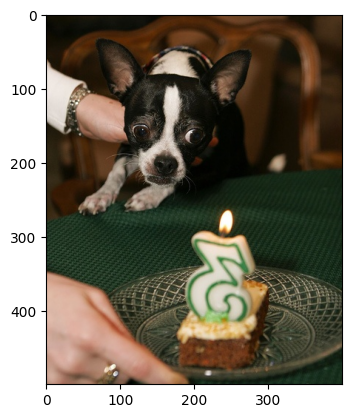

In [40]:
import random
from PIL import Image
import os
import matplotlib.pyplot as plt
# VOC 2007 label list
voc_labels = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow",
    "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# Path to VOC 2007 images
image_folder = "/content/ML-GCN_cvpr2019/models/data/VOCdevkit/VOC2007/JPEGImages"  # Modify if needed

# Pick a random image from the dataset
image_filename = random.choice(os.listdir(image_folder))
image_path = os.path.join(image_folder, image_filename)

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

print(f"Loaded Image: {image_filename}")
plt.imshow(image)
plt.show()

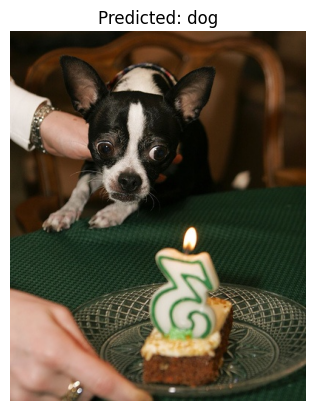

In [41]:
import matplotlib.pyplot as plt

# Run inference on the uploaded image
with torch.no_grad():
    image_tensor = image_tensor.cuda()  # Move image_tensor to GPU
    model = model.cuda()
    outputs = model(image_tensor)
    predictions = torch.sigmoid(outputs).squeeze().cpu().numpy()

# PASCAL VOC label list
voc_labels = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow",
    "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# Get predicted labels with confidence threshold (0.5)
predicted_labels1 = [voc_labels[i] for i, score in enumerate(predictions) if score > 0.3]

# Show image with title
plt.imshow(image)
plt.title(f"Predicted: {', '.join(predicted_labels1)}")
plt.axis("off")
plt.show()


In [42]:
class GMLA_Attack:
    def __init__(self, model, epsilon=32/255, step_size=8/255, num_steps=40):
        """
        Implements the Generalized Multi-Label Adversarial Attack (GMLA).

        Args:
        - model: ML-GCN model to attack.
        - epsilon: Maximum perturbation.
        - step_size: Step size for gradient update.
        - num_steps: Number of attack iterations.
        """
        self.model = model
        self.epsilon = epsilon
        self.step_size = step_size
        self.num_steps = num_steps

    def generate(self, image, labels):
        """
        Generate an adversarial example.

        Args:
        - image: Input image tensor (1, 3, 448, 448).
        - labels: Ground-truth labels (1, 20).

        Returns:
        - adversarial image.
        """
        # Ensure model is in eval mode
        self.model.eval()

        # Move to same device as model
        device = next(self.model.parameters()).device
        image = image.to(device)

        labels = labels.to(device)

        # Create perturbation variable
        perturbed_image = image.clone().detach().requires_grad_(True)

        for _ in range(self.num_steps):
            outputs = self.model(perturbed_image)
            loss = F.binary_cross_entropy_with_logits(outputs, labels)  # BCE Loss

            # Compute gradients
            self.model.zero_grad()
            loss.backward()

           # Compute projected gradient
            perturbation = self.step_size * perturbed_image.grad.sign()
            perturbed_image = perturbed_image + perturbation

            # Enforce semantic-aware constraint (Projection Step)
            perturbed_image = torch.clamp(perturbed_image, image - self.epsilon, image + self.epsilon)

            # Keep pixel values valid (0-1 range)
            perturbed_image = torch.clamp(perturbed_image, 0, 1)

            # Detach for next iteration
            perturbed_image = perturbed_image.detach().requires_grad_(True)

        # Remove extra dimension before returning the image
        return perturbed_image.squeeze(1)


In [43]:
import torch.nn.functional as F
# Instantiate attack
gmla = GMLA_Attack(model)

image_filename =  "003216.jpg"  # Replace this with the filename printed in Cell 5
image_path = os.path.join(image_folder, image_filename)

# Load the same image
# Replace this line in GMLA_Attack.generate() method:
# image = image.to(device)
# With:
device = next(model.parameters()).device

image = image_tensor.to(device) # Replace image with image_tensor to use the correct variable
#image_tensor = transform(image).unsqueeze(0).to(device) # Move to GPU

# Get a sample image and label
#image, target = next(iter(voc_loader))
#image = image.squeeze(0).unsqueeze(0).cuda()   # Move to GPU

# Convert VOC labels to tensor format (one-hot encoding)
labels = torch.zeros((1, 20)).to(device)
for obj in target["annotation"]["object"]:
    label_name = obj["name"]
    if label_name in voc_labels:
        labels[0, voc_labels.index(label_name)] = 1

# Generate adversarial image
adv_image = gmla.generate(image, labels)

# Run inference on the adversarial image
with torch.no_grad():
    outputs = model(adv_image)
    predictions = torch.sigmoid(outputs).squeeze().cpu().numpy()

# Get predicted labels
adv_predicted_labels = [voc_labels[i] for i, score in enumerate(predictions) if score > 0.3]

print(f"Original Predictions: {predicted_labels1}")
print(f"Adversarial Predictions: {adv_predicted_labels}")

Original Predictions: ['dog']
Adversarial Predictions: ['bottle', 'chair', 'diningtable', 'dog', 'person', 'sofa']


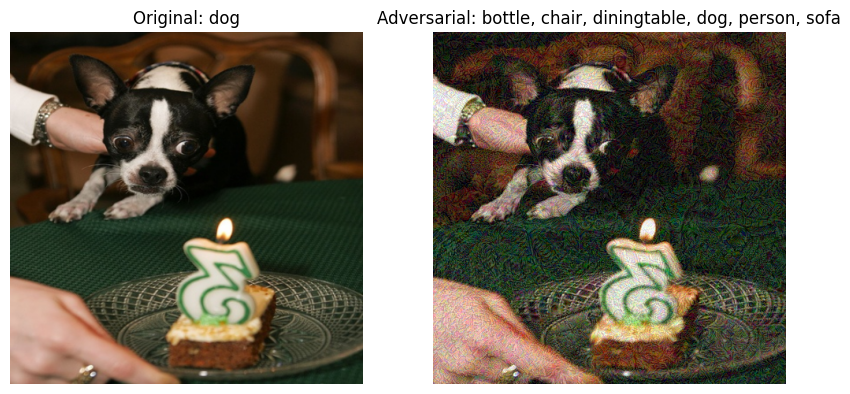

In [44]:
import matplotlib.pyplot as plt

# Convert tensors to images
original_img = image.squeeze(0).permute(1, 2, 0).cpu().numpy()
adv_img = adv_image.detach().squeeze(0).permute(1, 2, 0).cpu().numpy()

# Show side-by-side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original_img)
ax[0].set_title(f"Original: {', '.join(predicted_labels1)}")
ax[0].axis("off")

ax[1].imshow(adv_img)
ax[1].set_title(f"Adversarial: {', '.join(adv_predicted_labels)}")
ax[1].axis("off")

plt.show()

In [45]:
# Define a dictionary to store results
attack_results = []

# Run attack on multiple samples
for i, (image, target) in enumerate(voc_loader):  # Iterate over dataset
    if i >= 10:  # Process only first 10 images for now
        break

    image = image.cuda()  # Move to GPU

    # Convert VOC labels to tensor format
    labels = torch.zeros((1, 20)).cuda()
    for obj in target["annotation"]["object"]:
        label_name = obj["name"]
        if label_name in voc_labels:
            labels[0, voc_labels.index(label_name)] = 1

    # Run inference on the original image
    with torch.no_grad():
        outputs = model(image)
        original_predictions = torch.sigmoid(outputs).squeeze().cpu().numpy()
        original_labels = [voc_labels[i] for i, score in enumerate(original_predictions) if score > 0.3]

    # Generate adversarial image
    adv_image = gmla.generate(image, labels)

    # Run inference on the adversarial image
    with torch.no_grad():
        outputs = model(adv_image)
        adv_predictions = torch.sigmoid(outputs).squeeze().cpu().numpy()
        adv_labels = [voc_labels[i] for i, score in enumerate(adv_predictions) if score > 0.3]

    # Log results
    attack_results.append({
        "image_id": i,
        "original_labels": original_labels,
        "adversarial_labels": adv_labels
    })

    print(f"Image {i}: Original → {original_labels}, Adversarial → {adv_labels}")


Image 0: Original → ['person'], Adversarial → ['bottle', 'chair', 'diningtable', 'person']
Image 1: Original → ['aeroplane'], Adversarial → ['aeroplane']
Image 2: Original → ['aeroplane'], Adversarial → ['aeroplane']
Image 3: Original → ['car'], Adversarial → ['bicycle', 'bus', 'car', 'person', 'sofa']
Image 4: Original → ['person'], Adversarial → ['bicycle', 'bus', 'car', 'person']
Image 5: Original → ['person'], Adversarial → ['bottle', 'car', 'person', 'tvmonitor']
Image 6: Original → ['car'], Adversarial → ['bicycle', 'bus', 'car', 'person']
Image 7: Original → [], Adversarial → ['bird']
Image 8: Original → ['car', 'person'], Adversarial → ['bicycle', 'bus', 'car', 'person']
Image 9: Original → ['bottle'], Adversarial → ['bottle']


In [46]:
# Compute fooling rate
successful_attacks = sum(1 for r in attack_results if set(r["original_labels"]) != set(r["adversarial_labels"]))
fooling_rate = (successful_attacks / len(attack_results)) * 100

print(f"Fooling Rate: {fooling_rate:.2f}%")

Fooling Rate: 70.00%


In [48]:
import numpy as np

# Convert labels to binary format for mAP calculation
def convert_to_binary(label_list):
    return [1 if label in label_list else 0 for label in voc_labels]

original_binary = np.array([convert_to_binary(r["original_labels"]) for r in attack_results])
adv_binary = np.array([convert_to_binary(r["adversarial_labels"]) for r in attack_results])

# Compute mean average precision (mAP)
from sklearn.metrics import average_precision_score
mAP_original = average_precision_score(original_binary, original_binary, average="samples")
mAP_adversarial = average_precision_score(original_binary, adv_binary, average="samples")

print(f"mAP (Original): {mAP_original:.4f}")
print(f"mAP (Adversarial): {mAP_adversarial:.4f}")
print(f"mAP Drop: {(mAP_original - mAP_adversarial) * 100:.2f}%")

mAP (Original): 0.9000
mAP (Adversarial): 0.4700
mAP Drop: 43.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
